# Its On Us meal awards data analysis

data is output into the `output` folder

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_awarded = pd.read_csv('input/awarded.csv')
df_response = pd.read_csv('input/form_responses.csv')


## Two datasets, the responses and the awarded table

In [25]:
df_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              2920 non-null   object 
 1   phone_number           2920 non-null   object 
 2   meals                  2919 non-null   float64
 3   comments               1083 non-null   object 
 4   community              1294 non-null   object 
 5   statements_past_month  1304 non-null   object 
 6   age_group              1295 non-null   object 
 7   covid impact           1284 non-null   object 
 8   Unnamed: 8             4 non-null      object 
 9   Unnamed: 9             3 non-null      object 
 10  Unnamed: 10            1 non-null      object 
dtypes: float64(1), object(10)
memory usage: 251.1+ KB


In [26]:
df_awarded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     1184 non-null   object 
 1   phone_number  1184 non-null   object 
 2   amount        1184 non-null   int64  
 3   was_gifted    1184 non-null   object 
 4   Unnamed: 4    149 non-null    object 
 5   Unnamed: 5    2 non-null      object 
 6   Unnamed: 6    0 non-null      float64
 7   Unnamed: 7    0 non-null      float64
 8   Unnamed: 8    0 non-null      float64
 9   Unnamed: 9    1 non-null      object 
dtypes: float64(3), int64(1), object(6)
memory usage: 92.6+ KB


In [27]:
df_awarded.dropna(subset=['was_gifted'])['was_gifted'].value_counts()

Yes    687
yes    497
Name: was_gifted, dtype: int64

Let's see the distribution number of of meals and money awarded for a given phone number

Text(0, 0.5, 'Count')

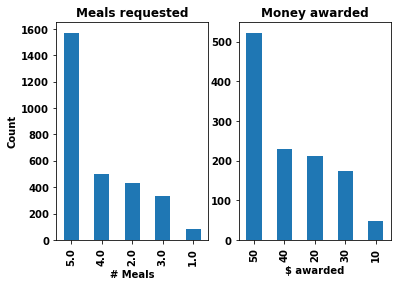

In [28]:

fig, axes = plt.subplots(1, 2)

df_response['meals'].value_counts().plot.bar(ax=axes[0])
df_awarded['amount'].value_counts().plot.bar(ax=axes[1])

axes[0].set_title('Meals requested')
axes[0].set_xlabel("# Meals")
axes[1].set_title('Money awarded')
axes[1].set_xlabel("$ awarded")
axes[0].set_ylabel('Count')


How many duplicated phone numbers are there in each dataset?

Default behavior of duplicated : Mark duplicates as True except for the first occurrence.

In [29]:
df_response['phone_number'].duplicated().value_counts()

True     2197
False     723
Name: phone_number, dtype: int64

In [30]:


df_awarded['phone_number'].duplicated().value_counts()

False    663
True     521
Name: phone_number, dtype: int64

## Per number data

Now we will add up the requested meals and awarded money for each phone number and look at the difference (assuming awarded money = 10*meals). This data is ouput to `per_phone_info.csv`

In [31]:

requested_meals = df_response.groupby('phone_number')['meals'].sum()
requested_meals.name = 'requested_meals'
awarded_meals = df_awarded.groupby('phone_number')['amount'].sum()
awarded_meals.name = 'awarded_money'

df_phone_info = pd.concat([requested_meals, awarded_meals],axis=1)

df_phone_info['difference'] = df_phone_info['awarded_money'] - 10*df_phone_info['requested_meals']
df_phone_info

df_phone_info.to_csv('output_notebook/per_phone_info.csv')


Text(0, 0.5, 'Count')

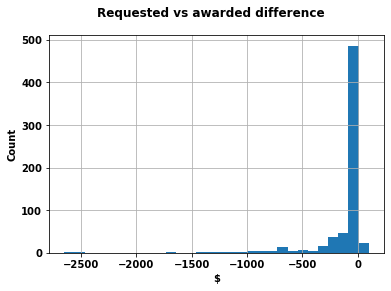

In [32]:
df_phone_info['difference'].hist(bins=30)
plt.suptitle('Requested vs awarded difference')
plt.xlabel("$")
plt.ylabel("Count")

We can also output a table of the data only where the difference is not zero (`per_phone_info_discrepancy.csv`)

In [33]:

discrepancy = df_phone_info.where(df_phone_info['difference'] != 0).dropna()
discrepancy.to_csv('output_notebook/per_phone_info_discrepancy.csv')


## Community analysis

Below we calculate the number of responses per community, and the total meals awarded to each community. I wasn't sure how to deal with the multiple responses per community (when someone gives muliple resonses), so those are still just kept as their own community for now. 

Text(0, 0.5, 'Count')

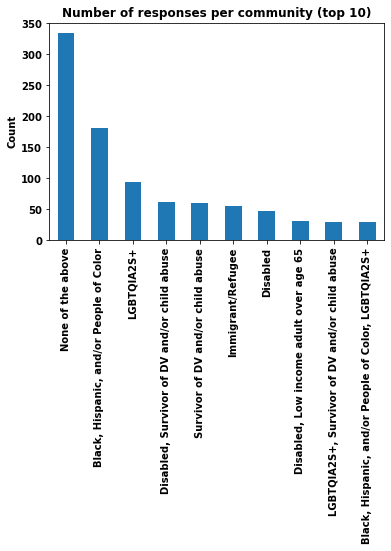

In [34]:

community_counts = df_response['community'].value_counts()
community_counts.name = 'community_counts '
community_counts 

community_counts.sort_values(ascending=False)[0:10].plot.bar()
plt.title('Number of responses per community (top 10)')
plt.ylabel('Count')


Text(0, 0.5, 'Total Meals')

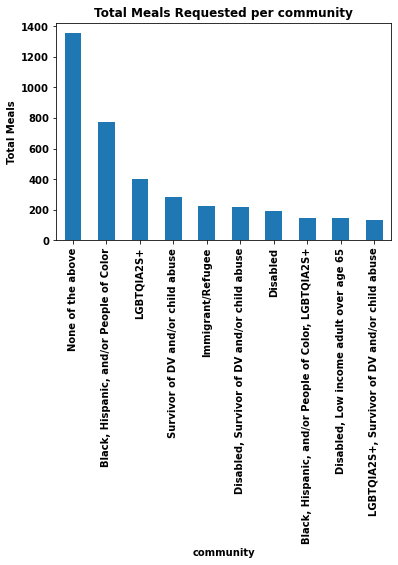

In [35]:


meals_per_community = df_response.groupby('community')['meals'].sum()
meals_per_community.name = 'meals_per_community' 
meals_per_community.sort_values(ascending=False)[0:10].plot.bar()
plt.title('Total Meals Requested per community')

plt.ylabel('Total Meals')

In [36]:
awarded_numbers = df_awarded['phone_number'].unique()
awarded_numbers


latest_responses = df_response.drop_duplicates(subset='phone_number', keep='last').set_index('phone_number')

mutual_numbers = [number for number in awarded_numbers if number in latest_responses.index]

community_awarded_number = latest_responses.loc[mutual_numbers]['community']
# community_awarded_number 

In [37]:
total_awarded_number = df_awarded.groupby('phone_number')['amount'].sum()[mutual_numbers]
# total_awarded_number

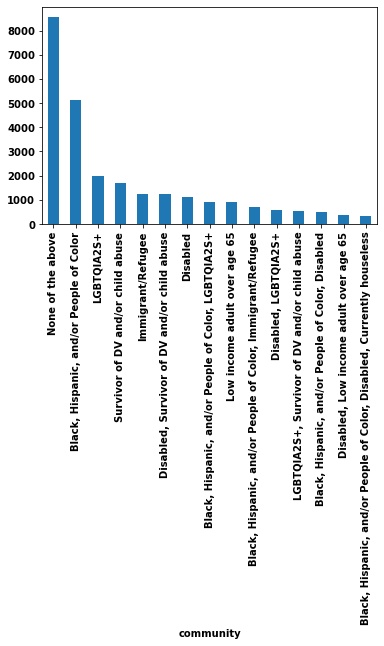

In [38]:
df = pd.concat([community_awarded_number, total_awarded_number],axis=1)
community_money = df.groupby('community')['amount'].sum().sort_values(ascending=False)
community_money[0:15].plot.bar() 

In [39]:
total_money_awarded = total_awarded_number.sum()
print("The total money awarded was {} Dollars".format(total_money_awarded))



The total money awarded was 44980 Dollars


Text(0.5, 1.0, 'percentage of money awarded by community (last response)')

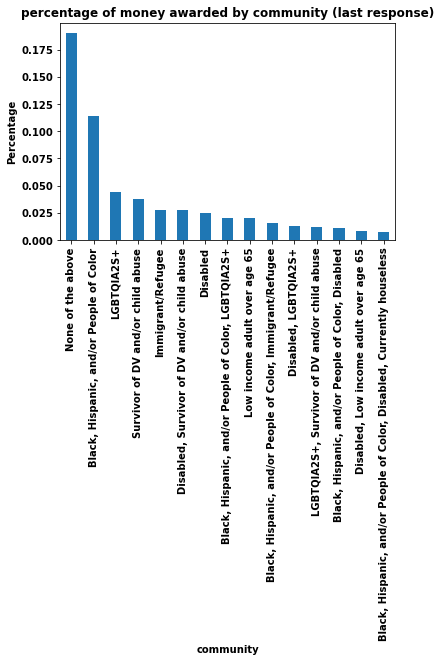

In [40]:

fraction_awarded_community = community_money/total_money_awarded

fraction_awarded_community[0:15].plot.bar()
plt.ylabel('Percentage')
plt.title("percentage of money awarded by community (last response)")

In [41]:
df_community_stats = pd.concat([community_counts, meals_per_community],axis=1)
df_community_stats
df_community_stats.to_csv('output_notebook/community_stats.csv')

In [42]:
df_community_stats

,community_counts,meals_per_community
None of the above,334,1355.0
"Black, Hispanic, and/or People of Color",181,774.0
LGBTQIA2S+,94,403.0
"Disabled, Survivor of DV and/or child abuse",62,215.0
Survivor of DV and/or child abuse,60,283.0
...,...,...
"Black, Hispanic, and/or People of Color, Low income adult over age 65, Survivor of DV and/or child abuse",1,4.0
"Black, Hispanic, and/or People of Color, Disabled, LGBTQIA2S+",1,5.0
low income,1,5.0
"Black, Hispanic, and/or People of Color, Low income",1,3.0
